<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Kaggle_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

In [46]:
df=pd.read_csv("/content/car data.csv")

In [47]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [48]:
df.shape

(301, 9)

In [49]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [50]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [51]:
print(df['Owner'].unique())

[0 1 3]


In [52]:
#check missing or null values
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [53]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [54]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [55]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [56]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
final_dataset['Current_Year']=2024

In [58]:
final_dataset['no_of_years']=final_dataset['Current_Year']-final_dataset['Year']

In [59]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [60]:
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [61]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [62]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [64]:
# Convert only the boolean columns to int
boolean_columns = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']

# Apply conversion to specific boolean columns
final_dataset[boolean_columns] = final_dataset[boolean_columns].astype(int)

# Check the result
final_dataset.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [65]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [66]:
import seaborn as sns

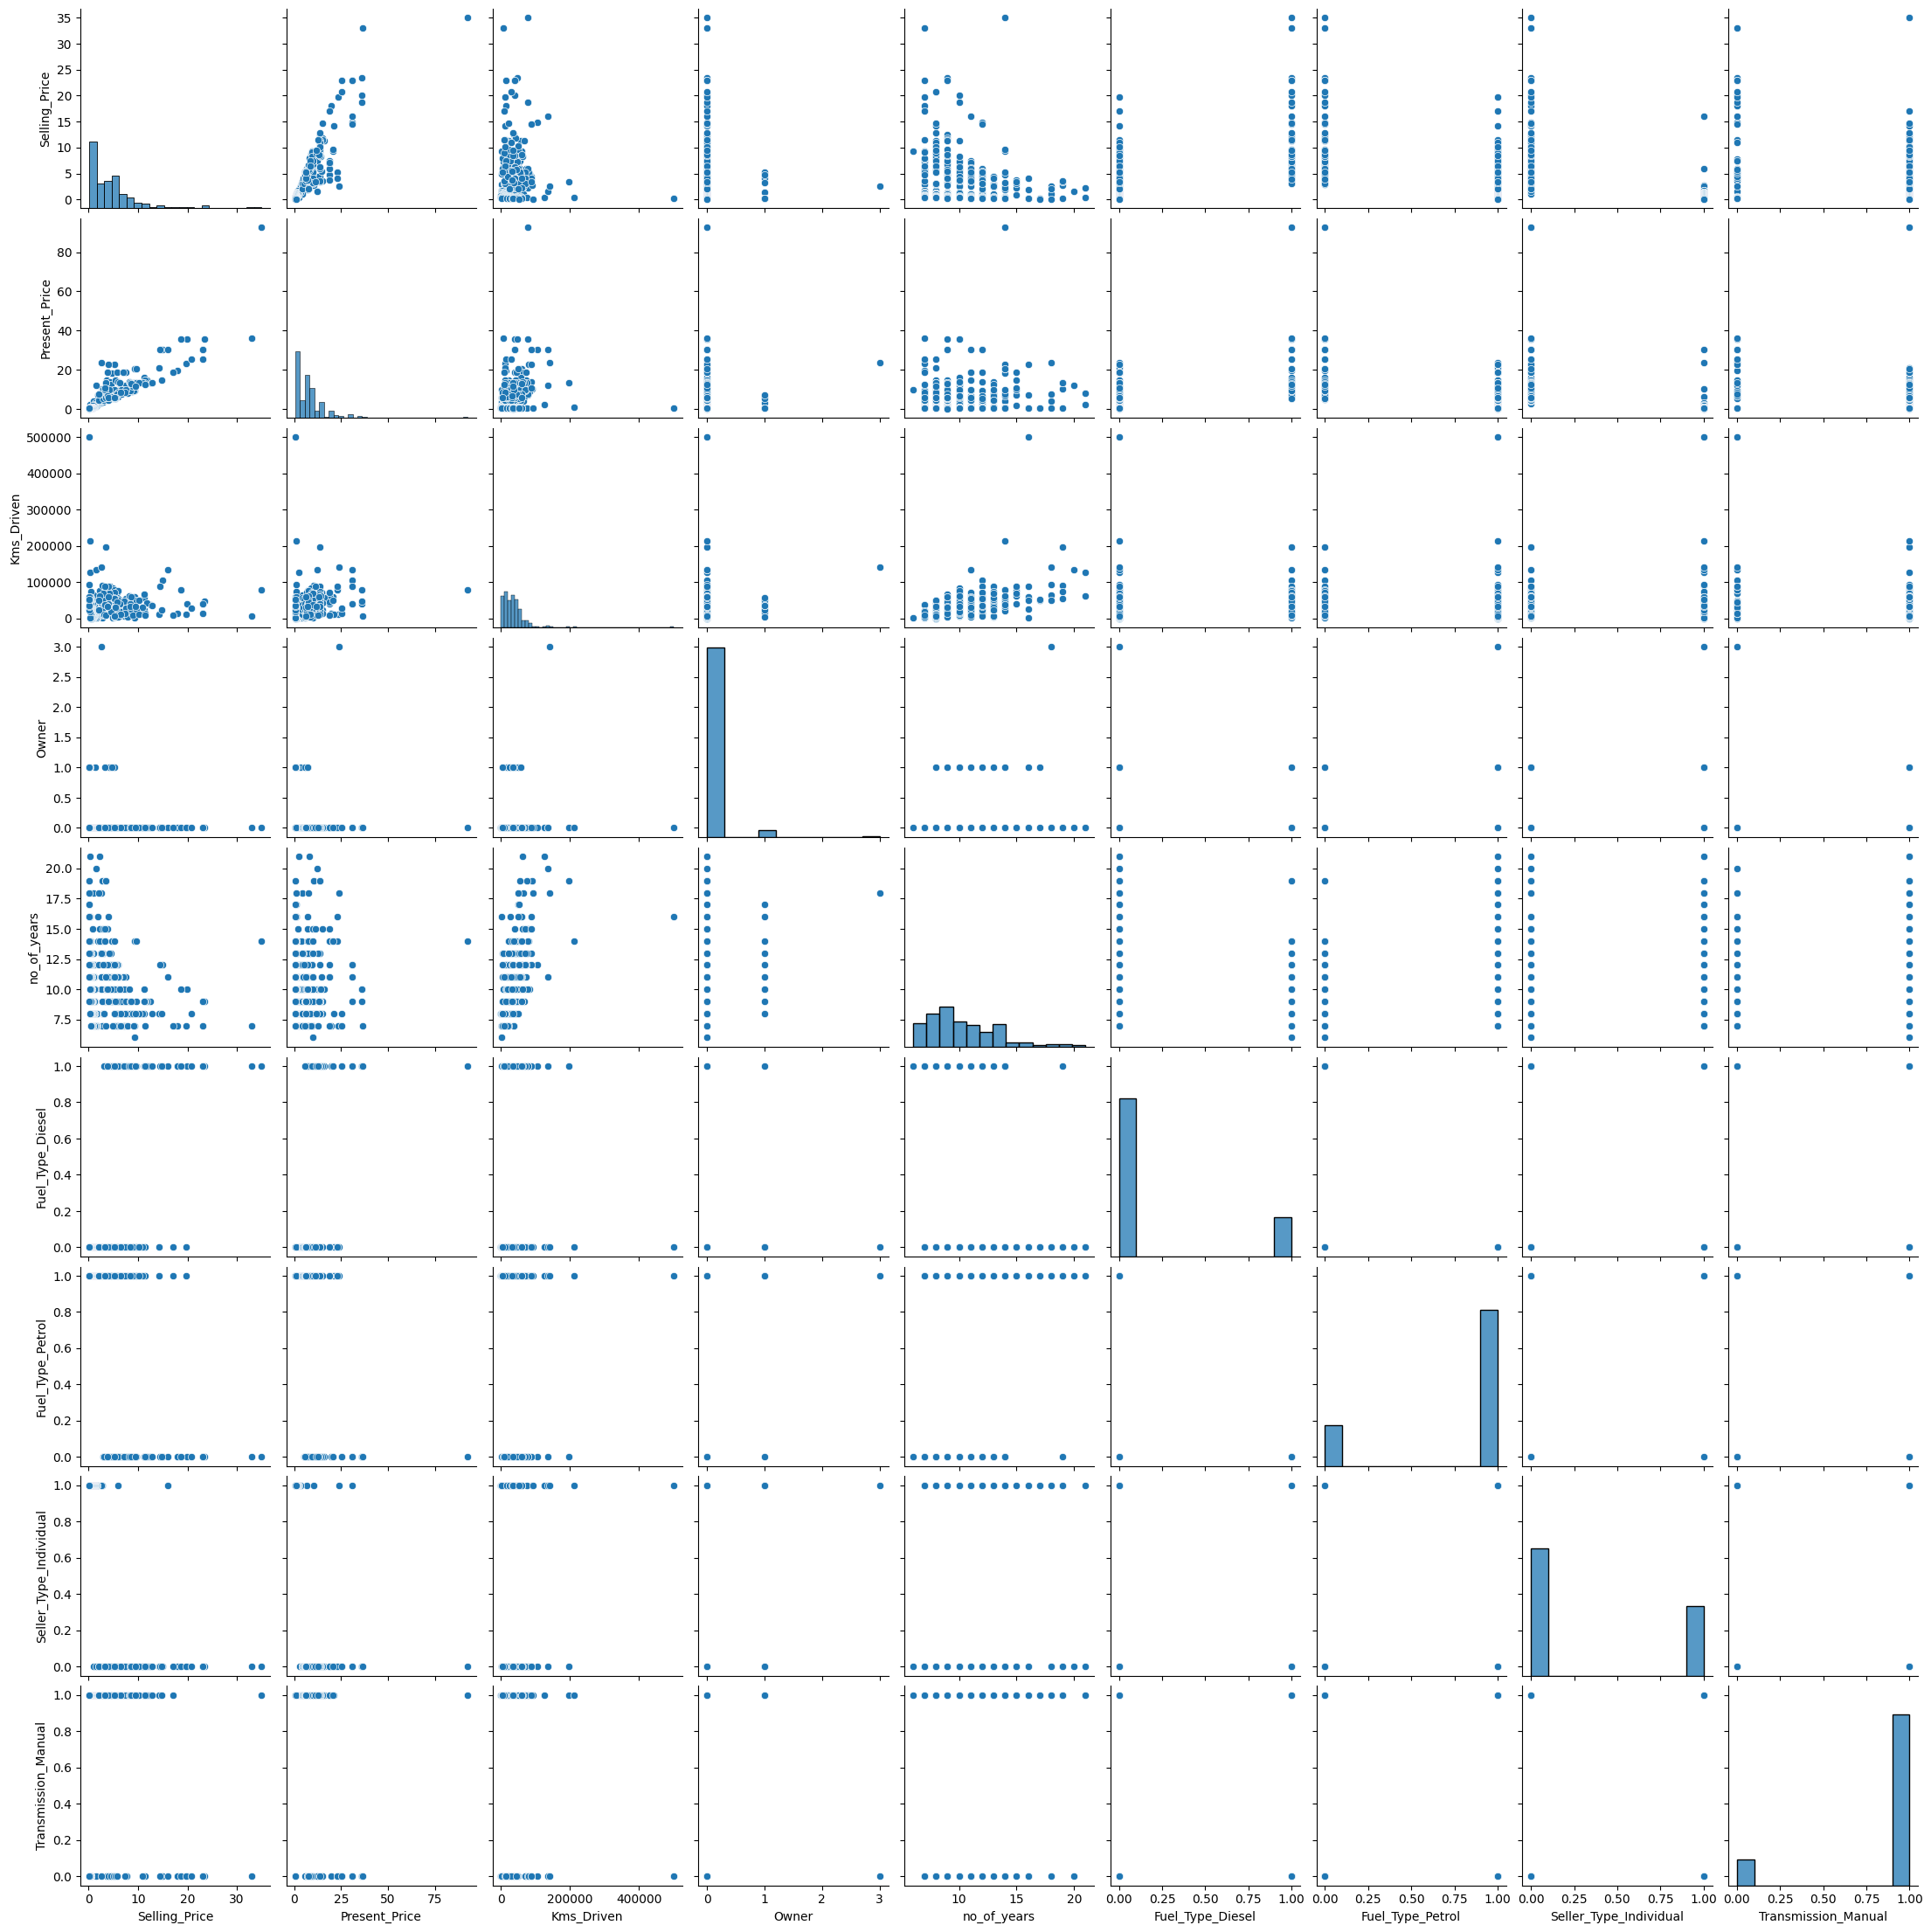

In [67]:
sns.pairplot(final_dataset)

In [68]:
import matplotlib.pyplot as plt

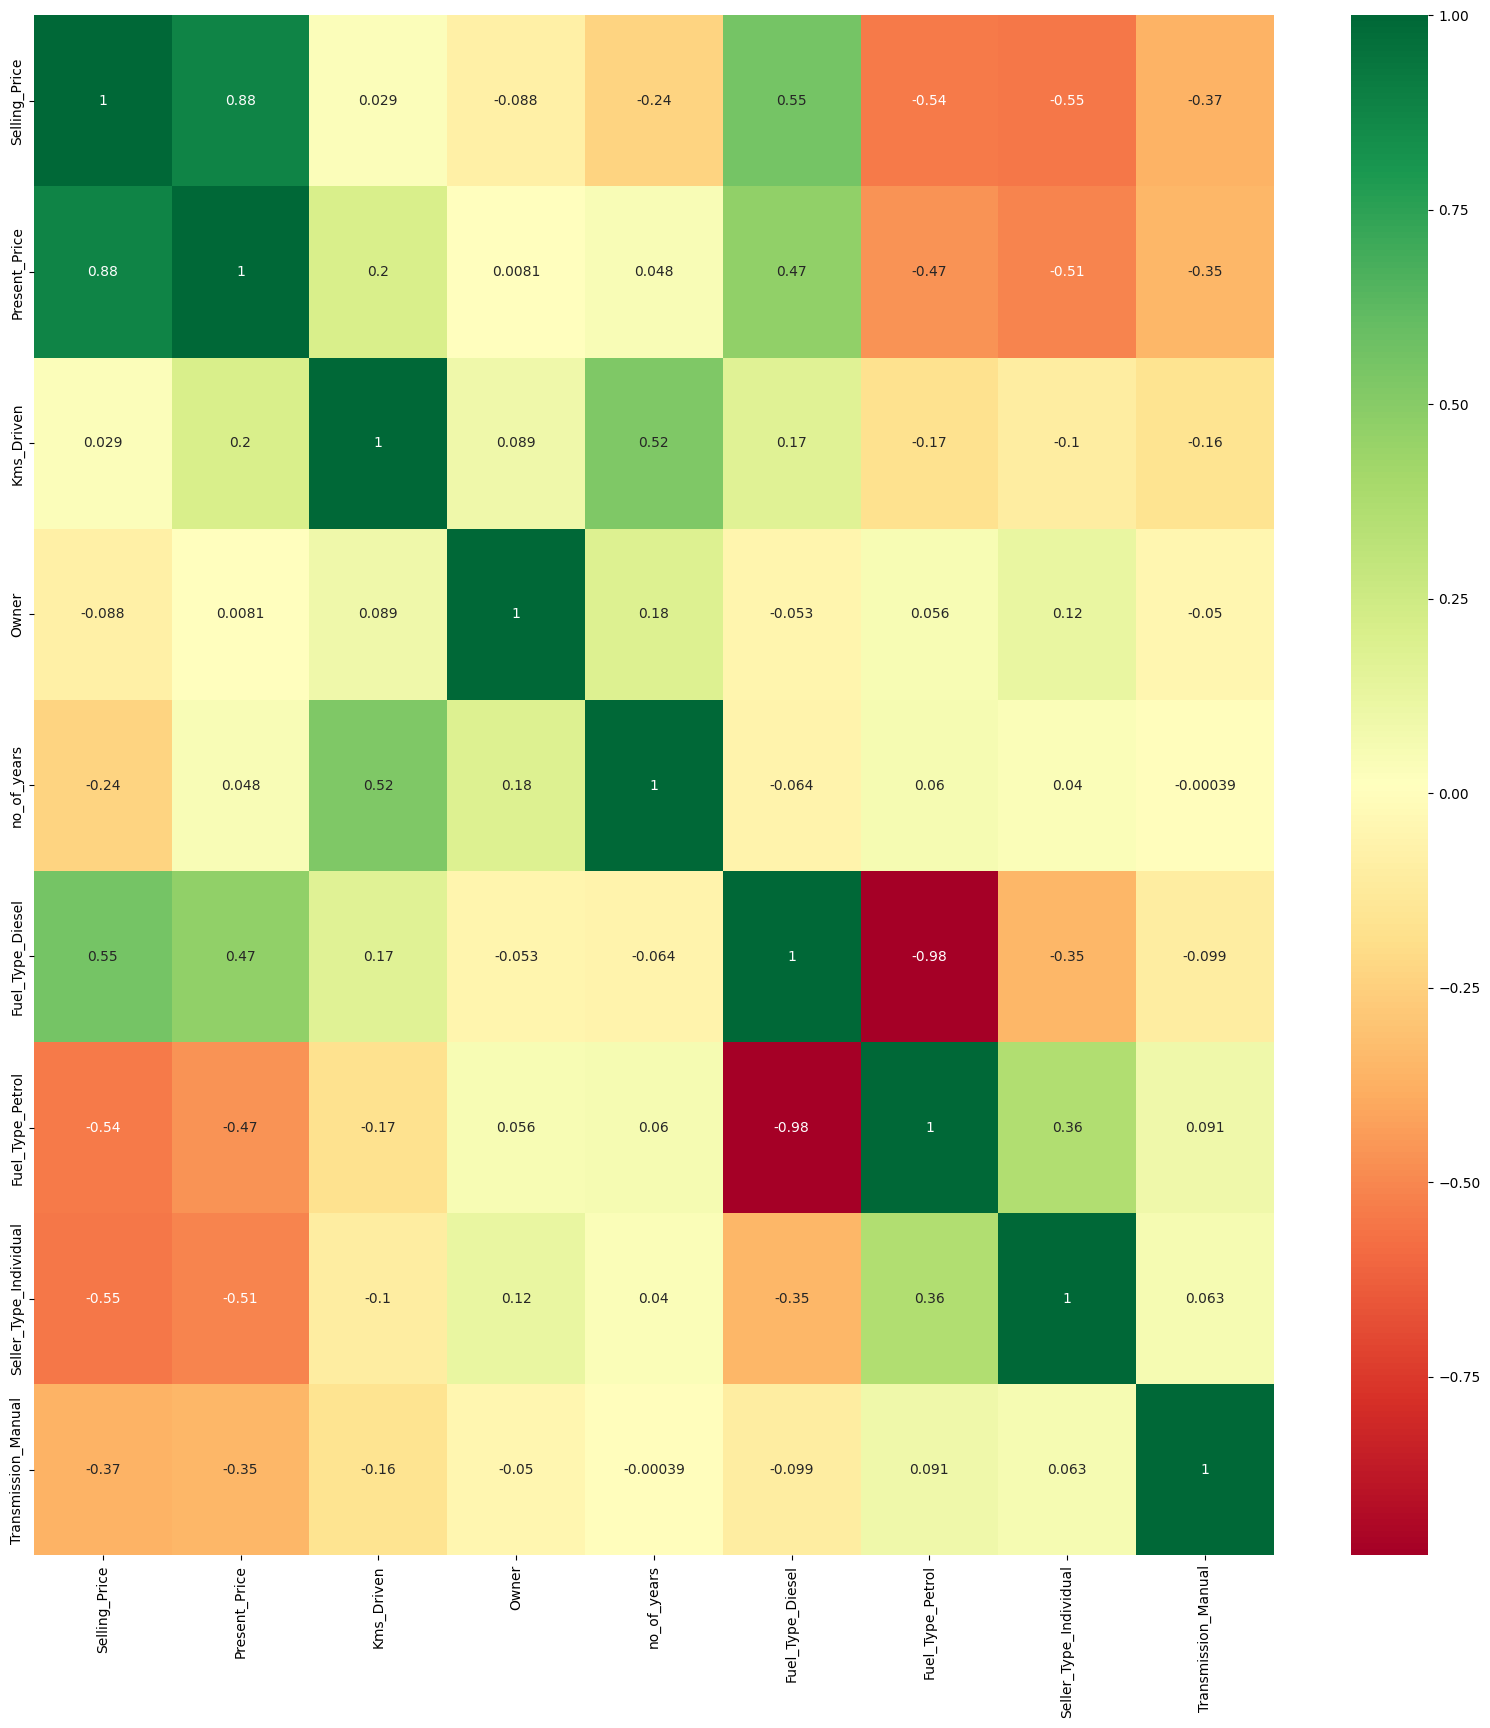

In [70]:
corr_mat=final_dataset.corr()
top_corr_features=corr_mat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [71]:
# Independent and dependent features
X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]

In [72]:
### feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [74]:
print(model.feature_importances_)

[0.39109032 0.04074952 0.0004377  0.08006585 0.22702672 0.00938166
 0.1207171  0.13053113]


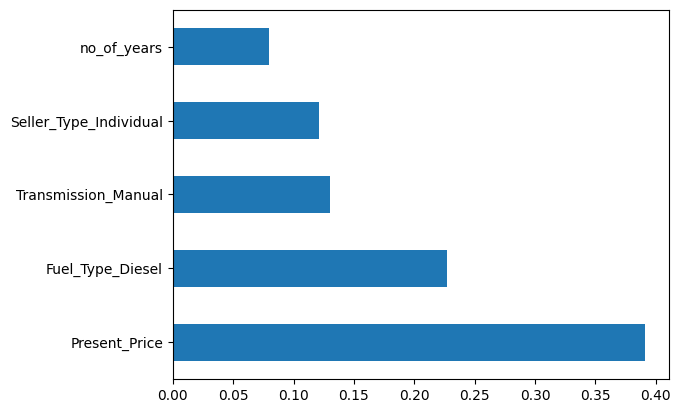

In [76]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [78]:
X_train.shape

(240, 8)

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [80]:
import numpy as np

In [84]:
### Hyper Parameters
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [87]:
rf=RandomForestRegressor()

In [88]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [90]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [91]:
predictions=rf_random.predict(X_test)

In [92]:
predictions

array([ 0.88312,  9.99263,  5.31007,  0.30339,  6.84814,  6.3947 ,
        1.00913,  0.62017,  0.51444,  6.1986 , 11.49026,  0.87687,
        7.4306 ,  0.73733,  5.41285,  3.10204,  0.97501, 11.10234,
        0.64094,  1.4591 ,  0.54163,  8.75786,  5.94891,  2.7452 ,
        0.54055,  3.6163 ,  5.26705,  3.08735,  1.19479,  1.07027,
        0.64921,  9.58322,  0.42237,  2.63592,  8.0645 ,  4.13625,
        6.02825,  4.71609,  3.22461,  5.22866,  3.87765,  3.92965,
        4.84335,  0.56755,  6.91238,  0.55873,  7.01313,  5.8968 ,
        3.15495,  3.68494,  5.44398,  1.38665, 20.65856, 21.08087,
        6.81115,  8.65719,  5.19311,  9.64526,  2.59563,  7.32554,
        0.29913])

<ipython-input-93-b1428b43cb25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-predictions)


<Axes: xlabel='Selling_Price', ylabel='Density'>

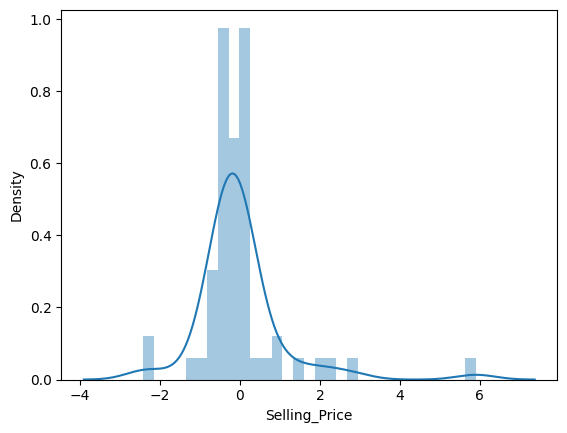

In [93]:
sns.distplot(Y_test-predictions)

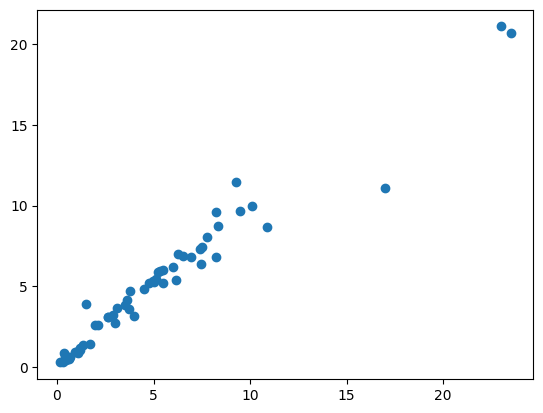

In [94]:
plt.scatter(Y_test,predictions)

In [95]:
import pickle
file = open('car_rf_model.pkl','wb')
pickle.dump(rf_random,file)

In [96]:
# Check Accuracy of model
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)

0.94653372014963